In [6]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)

# Cell 2: Load Data
# Load, parse dates, and sort
df = pd.read_excel('D:\public-transport-forecast\data\Daily_Public_Transport_Passenger_Journeys.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

# Handle potential missing values (e.g., empty strings at the end of the file)
df = df.dropna(how='all')
df = df.fillna(0) # Fill NaNs with 0, assuming missing means no riders

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2019-07-01 to 2024-09-29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Local Route   1918 non-null   int64  
 1   Light Rail    1918 non-null   int64  
 2   Peak Service  1918 non-null   int64  
 3   Rapid Route   1918 non-null   int64  
 4   School        1918 non-null   int64  
 5   Other         1918 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 104.9 KB
None
            Local Route  Light Rail  Peak Service  Rapid Route  School  Other
Date                                                                         
2019-07-01        15987        9962           407        21223    3715    0.0
2019-07-02        16895       10656           409        21715    3993    0.0
2019-07-03        16613       10658           427        22025    3638    0.0
2019-07-04        16604       10445           437        21868    3576    0.0
2019-07

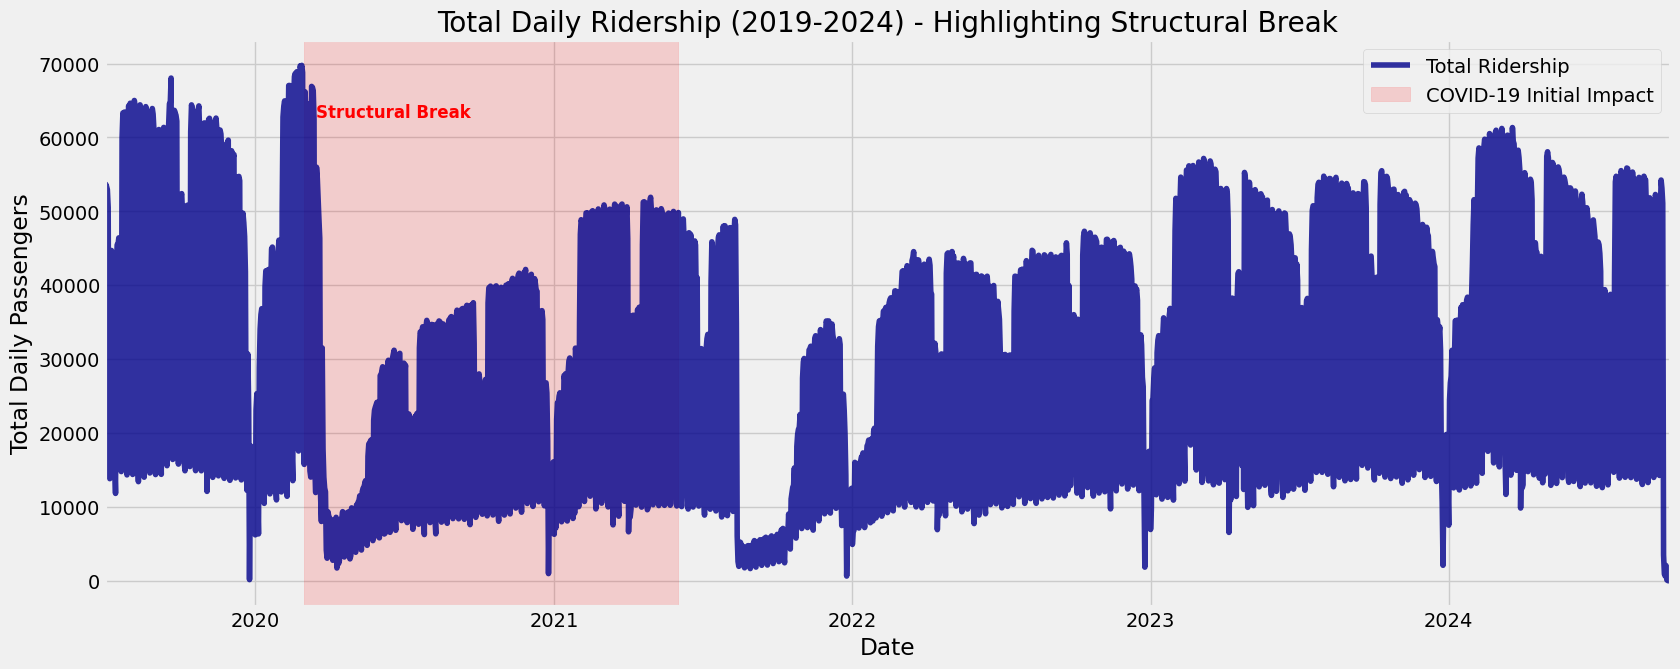

In [7]:
# Add Total Ridership column
df['Total Ridership'] = df.drop('Other', axis=1).sum(axis=1)  # Exclude 'Other' for clean total

# Cell 3: Insight 1 - Total Ridership and COVID-19 Impact
plt.figure(figsize=(18, 7))
df['Total Ridership'].plot(title='Total Daily Ridership (2019-2024) - Highlighting Structural Break', alpha=0.8, color='darkblue')
plt.axvspan('2020-03-01', '2021-06-01', color='red', alpha=0.15, label='COVID-19 Initial Impact')
plt.text('2020-03-15', df['Total Ridership'].max() * 0.9, 'Structural Break', color='red', fontsize=12, fontweight='bold')
plt.legend()
plt.ylabel('Total Daily Passengers')
plt.show()

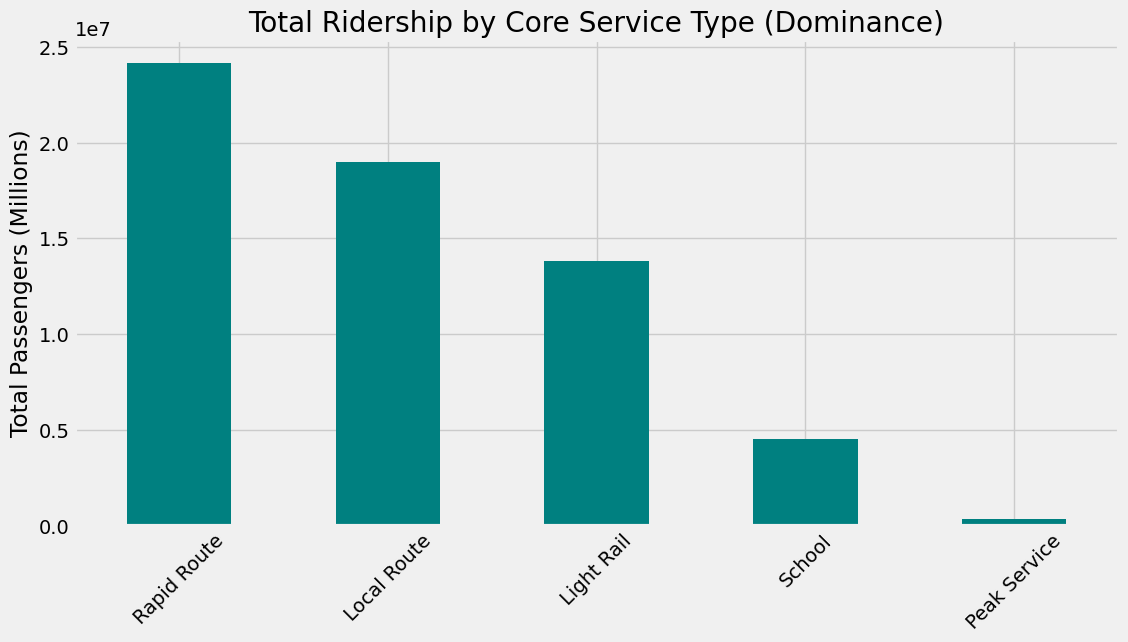


Total Ridership by Service:
Rapid Route     24161455
Local Route     18971696
Light Rail      13800866
School           4512469
Peak Service      344437
dtype: int64


In [8]:
# Cell 4: Service Hierarchy Analysis
total_by_service = df.drop(['Total Ridership', 'Other'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
total_by_service.plot(kind='bar', title='Total Ridership by Core Service Type (Dominance)', color='teal')
plt.ylabel('Total Passengers (Millions)')
plt.xticks(rotation=45)
plt.show()
print("\nTotal Ridership by Service:")
print(total_by_service)

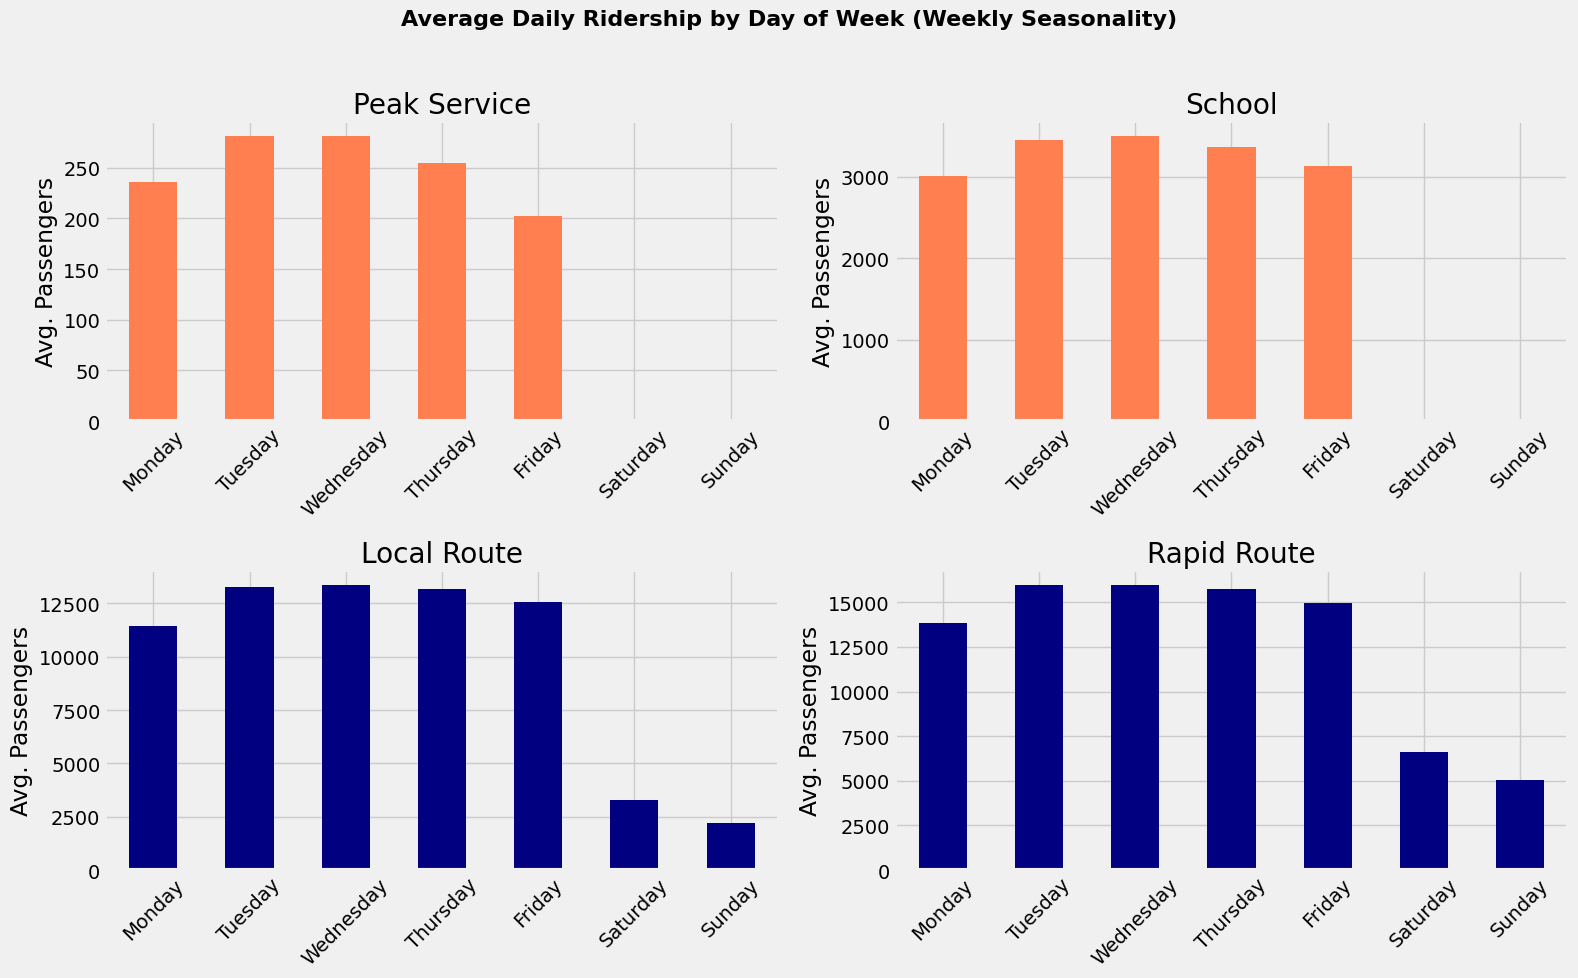

In [9]:
# Cell 5: Weekly Seasonality Analysis
# Group by day of the week
df_weekly = df.groupby(df.index.day_name())[df.columns].mean()
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekly = df_weekly.reindex(week_order)

# Plot only the highly seasonal services
seasonal_cols = ['Peak Service', 'School', 'Local Route', 'Rapid Route']

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
axes = axes.flatten()
plt.suptitle('Average Daily Ridership by Day of Week (Weekly Seasonality)', fontsize=16, fontweight='bold')

for i, col in enumerate(seasonal_cols):
    df_weekly[col].plot(kind='bar', ax=axes[i], title=col, color='coral' if col in ['Peak Service', 'School'] else 'navy')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Avg. Passengers')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

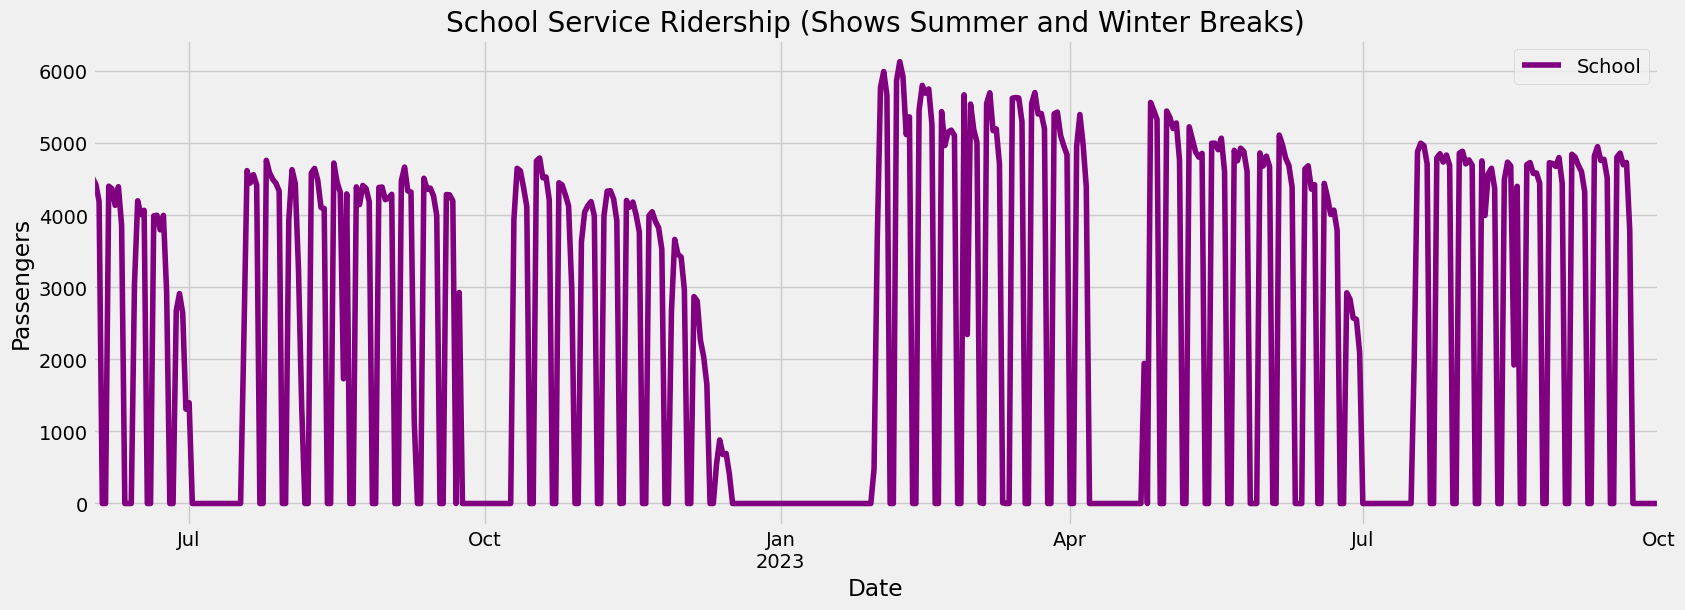

In [10]:
# Cell 6: School and Holiday Pattern Analysis
plt.figure(figsize=(18, 6))
df['School'].loc['2022-06-01':'2023-10-01'].plot(title='School Service Ridership (Shows Summer and Winter Breaks)', label='School', color='purple')
plt.legend()
plt.ylabel('Passengers')
plt.show()